In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import seaborn as sns

## 1. Generate synthetic data


In [2]:
np.random.seed(42)



# Normal, peu dispersé
feature_1 = np.random.normal(loc=50,
                             scale=5,
                             size=100
                             )

# Skewed, valeurs élevées fréquentes
feature_2 = np.random.exponential(scale=50,
                                  size=100
                                  )

# Avec outliers très marqués
feature_3 = np.append(np.random.normal(loc=10,
                                       scale=2,
                                       size=95
                                       ),
                      [150, 200, 250, 300, 350])


df = pd.DataFrame({
    'Normal': feature_1,
    'Skewed': feature_2,
    'With_Outliers': feature_3
})


## 2. Visualize distributions
### Using boxplot and kernel density estimation

<Axes: title={'center': 'Original distributions'}>

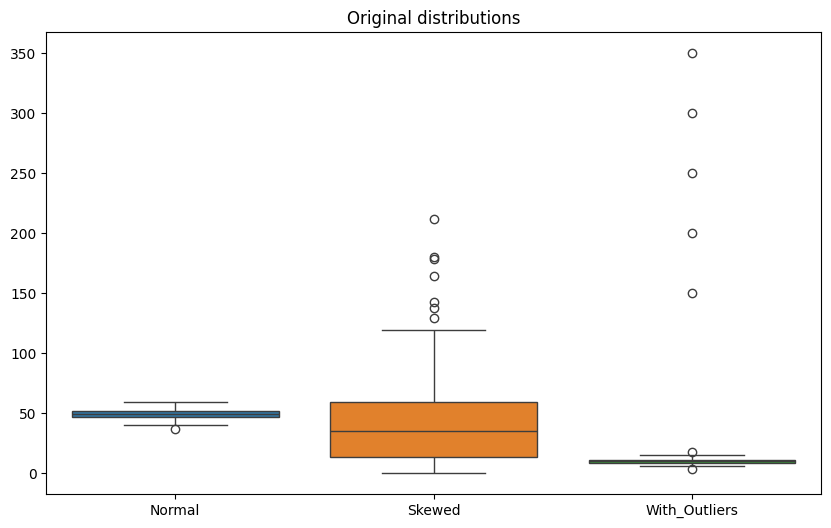

In [3]:
plt.figure(figsize=(10, 6))
plt.title("Original distributions")
sns.boxplot(df)

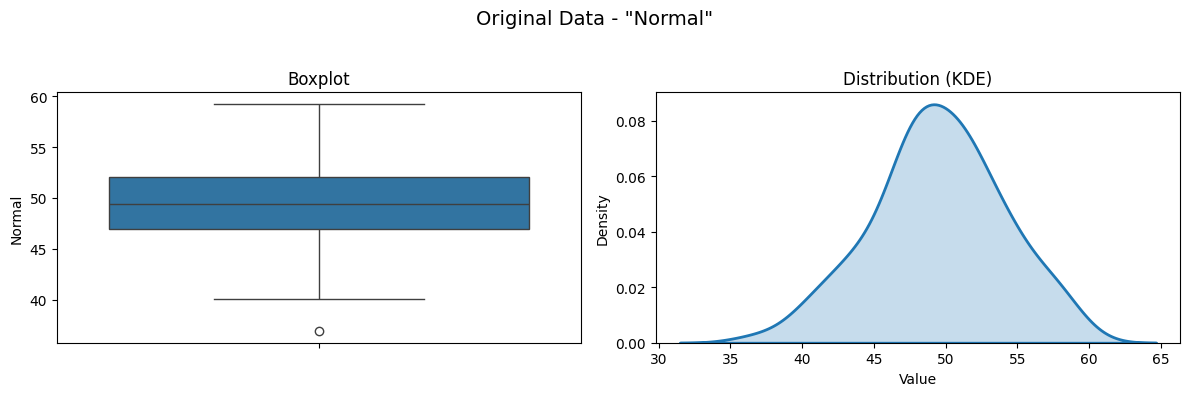

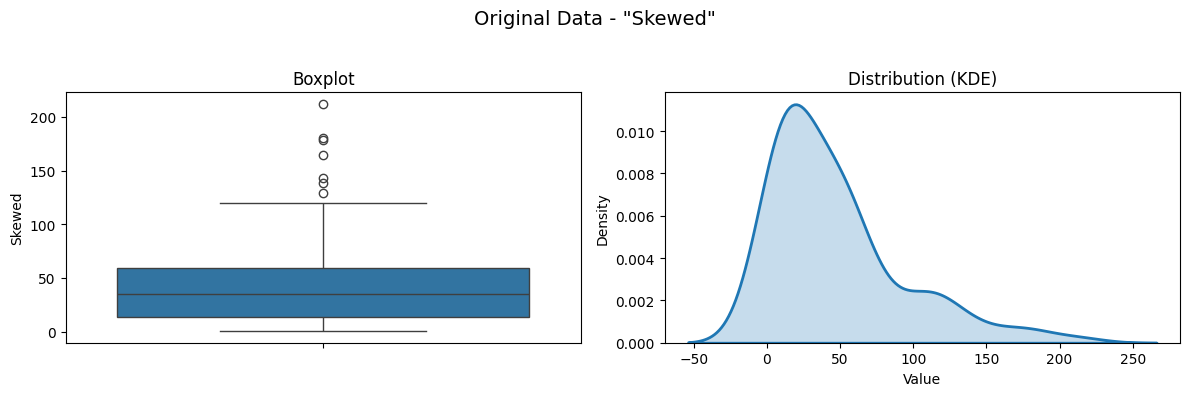

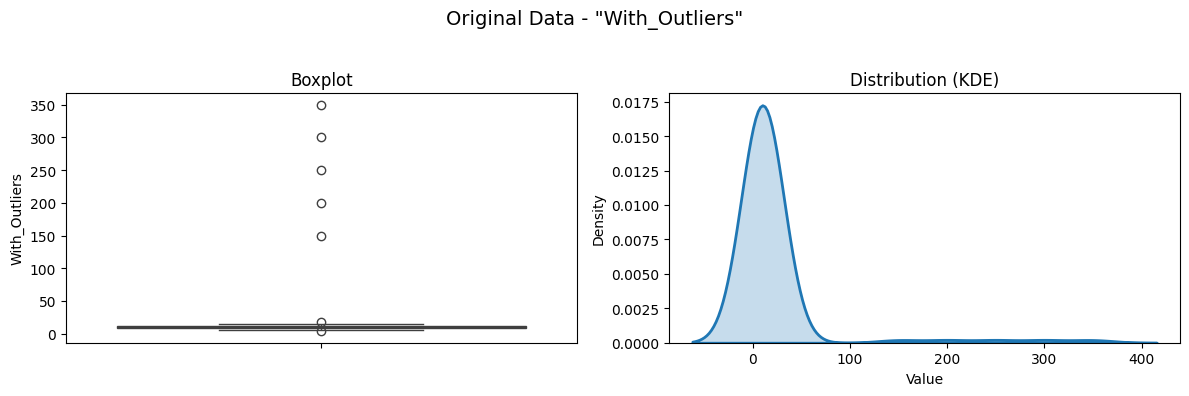

In [4]:


for col in df.columns:
    fig, axes = plt.subplots(1,
                             2,
                             figsize=(12, 4)
                             )

    fig.suptitle(f'Original Data - "{col}"',
                 fontsize=14
                 )

    sns.boxplot(y=df[col],
                ax=axes[0]
                )

    axes[0].set_title('Boxplot')
    axes[0].set_ylabel(col)

    sns.kdeplot(df[col],
                fill=True,
                linewidth=2,
                ax=axes[1]
                )

    axes[1].set_title('Distribution (KDE)')
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Density')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## 3. Apply different scalers

In [5]:
# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Apply each scaler
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df),
                         columns=df.columns
                         )
df_standard = pd.DataFrame(standard_scaler.fit_transform(df),
                           columns=df.columns
                           )
df_robust = pd.DataFrame(robust_scaler.fit_transform(df),
                         columns=df.columns
                         )

## 4. Plot all scaled versions

<Axes: title={'center': 'Min-Max scaling'}>

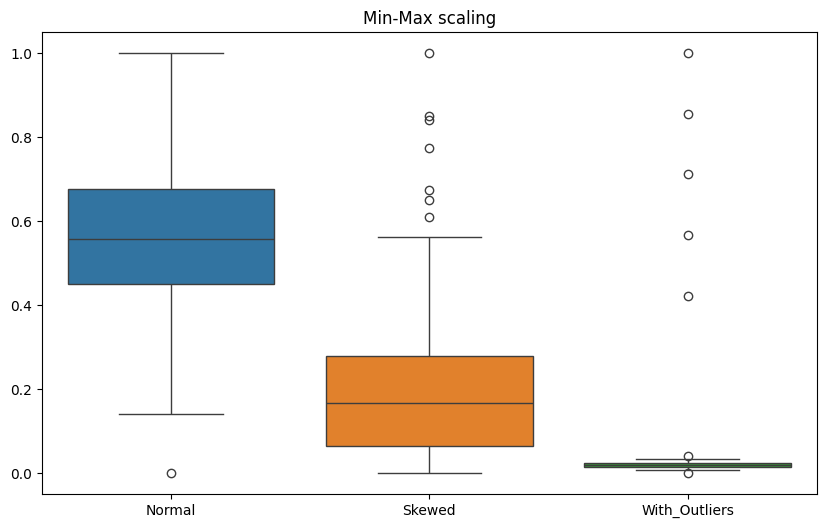

In [6]:
plt.figure(figsize=(10, 6))
plt.title("Min-Max scaling")
sns.boxplot(df_minmax)

<Axes: title={'center': 'Standard scaling'}>

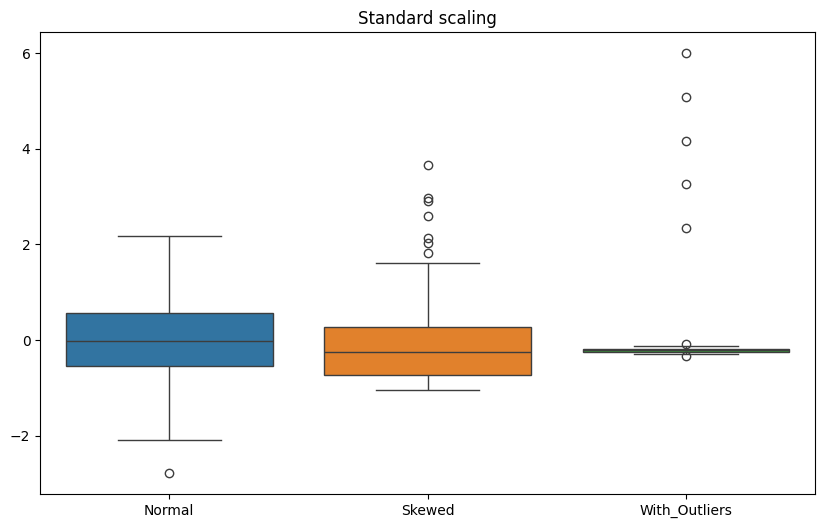

In [7]:
plt.figure(figsize=(10, 6))
plt.title("Standard scaling")
sns.boxplot(df_standard)

<Axes: title={'center': 'Robust scaling'}>

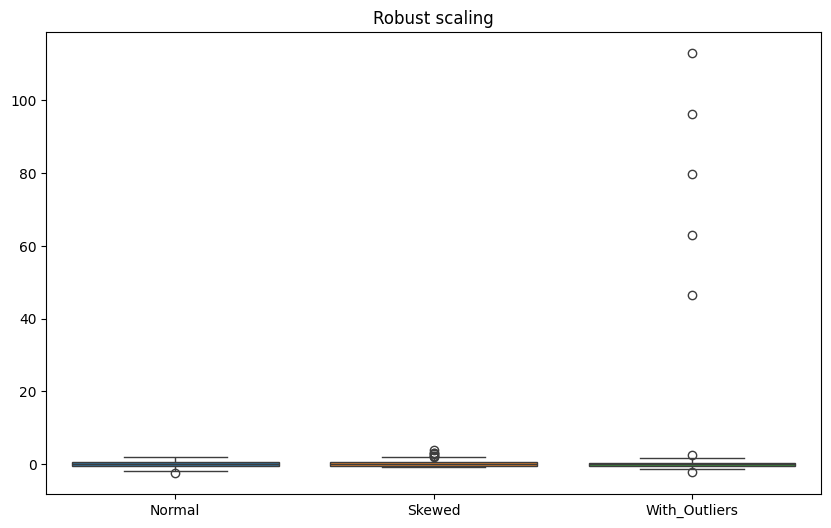

In [8]:
plt.figure(figsize=(10, 6))
plt.title("Robust scaling")
sns.boxplot(df_robust,
            showfliers = True)

<Axes: title={'center': 'Robust scaling'}>

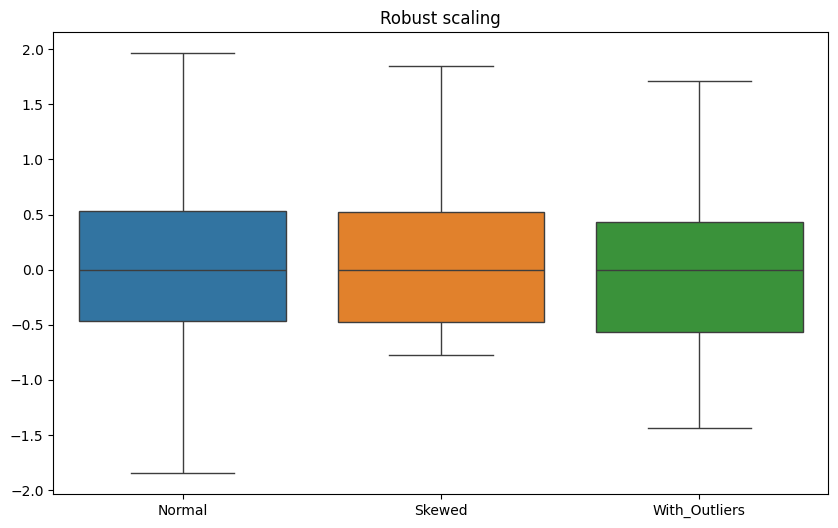

In [11]:
plt.figure(figsize=(10, 6))
plt.title("Robust scaling")
sns.boxplot(df_robust,
            showfliers = False)